#Linear regression vs lasso regression Car price prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:

#loading dataset to pandas dataframe
data=pd.read_csv('/content/car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape


(301, 9)

In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#getting some statistical method about the data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


##encoding the data

In [ ]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
Y = data['Selling_Price']
print(X)
print("---------------------------------------")
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

##splitting data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X , Y,test_size=0.1,random_state=1)    #donot write stratify=Y as it only works for classification algo

#Linear reggression Training

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

Model Evaluation

In [ ]:
X_train_prediction=model.predict(X_train)
training_data_acuracy=metrics.r2_score(Y_train,X_train_prediction)
print(training_data_acuracy)

0.888658825760646


In [ ]:
X_test_prediction=model.predict(X_test)
test_data_acuracy=metrics.r2_score(X_test_prediction,Y_test)
print(test_data_acuracy)

0.6209908213647468


##Visualize actual price vs predicted price

Text(0.5, 1.0, 'actual price vs predicted price')

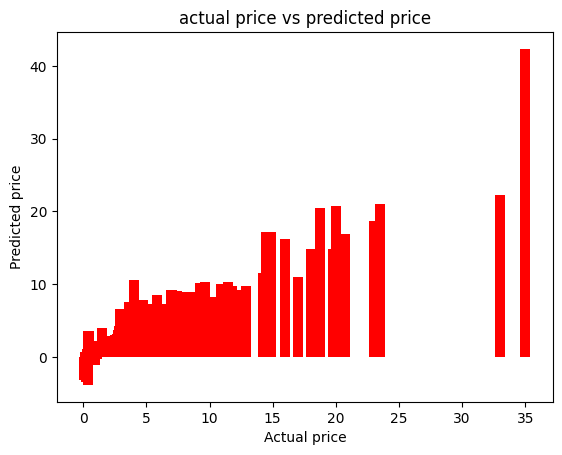

In [ ]:
plt.bar(Y_train,X_train_prediction,color='red')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title("actual price vs predicted price")